<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_1X/blob/main/GQtest_cluster_data(y_hat)_multi_delta_(4)_n250_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_1X/multiplication_delta_4'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_4_n250.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,24.505503,633.053368,667.558871,52.583816,614.975055
1,0.0,1.0,63.539840,-670.120480,-596.580639,533.354235,-1129.934874
2,0.0,2.0,80.061901,-3816.709951,-3726.648049,736.849895,-4463.497944
3,0.0,3.0,42.628390,4637.766221,4690.394611,275.796214,4414.598397
4,0.0,4.0,61.539240,2519.629979,2591.169219,508.713638,2082.455581
...,...,...,...,...,...,...,...
249995,999.0,245.0,67.304801,2634.396818,2711.701620,157.219833,2554.481787
249996,999.0,246.0,40.770792,1267.990263,1318.761054,174.664130,1144.096925
249997,999.0,247.0,73.345656,233.169705,316.515361,153.248384,163.266977
249998,999.0,248.0,63.158563,-2309.535392,-2236.376829,159.945701,-2396.322530


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1            e            Y       y_hat        e_hat
rep   index                                                              
0.0   0.0    24.505503   633.053368   667.558871   52.583816   614.975055
      1.0    63.539840  -670.120480  -596.580639  533.354235 -1129.934874
      2.0    80.061901 -3816.709951 -3726.648049  736.849895 -4463.497944
      3.0    42.628390  4637.766221  4690.394611  275.796214  4414.598397
      4.0    61.539240  2519.629979  2591.169219  508.713638  2082.455581
...                ...          ...          ...         ...          ...
999.0 245.0  67.304801  2634.396818  2711.701620  157.219833  2554.481787
      246.0  40.770792  1267.990263  1318.761054  174.664130  1144.096925
      247.0  73.345656   233.169705   316.515361  153.248384   163.266977
      248.0  63.158563 -2309.535392 -2236.376829  159.945701 -2396.322530
      249.0  56.256874 -2639.071620 -2572.814746  164.483089 -2737.297836

[250000 rows x 5 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1            e            Y       y_hat        e_hat
rep   index                                                              
0.0   0.0    24.505503   633.053368   667.558871   52.583816   614.975055
      1.0    63.539840  -670.120480  -596.580639  533.354235 -1129.934874
      2.0    80.061901 -3816.709951 -3726.648049  736.849895 -4463.497944
      3.0    42.628390  4637.766221  4690.394611  275.796214  4414.598397
      4.0    61.539240  2519.629979  2591.169219  508.713638  2082.455581
...                ...          ...          ...         ...          ...
999.0 245.0  67.304801  2634.396818  2711.701620  157.219833  2554.481787
      246.0  40.770792  1267.990263  1318.761054  174.664130  1144.096925
      247.0  73.345656   233.169705   316.515361  153.248384   163.266977
      248.0  63.158563 -2309.535392 -2236.376829  159.945701 -2396.322530
      249.0  56.256874 -2639.071620 -2572.814746  164.483089 -2737.297836

[250000 rows x 5 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,24.505503,633.053368,667.558871,52.583816,614.975055
1,0.0,1.0,63.539840,-670.120480,-596.580639,533.354235,-1129.934874
2,0.0,2.0,80.061901,-3816.709951,-3726.648049,736.849895,-4463.497944
3,0.0,3.0,42.628390,4637.766221,4690.394611,275.796214,4414.598397
4,0.0,4.0,61.539240,2519.629979,2591.169219,508.713638,2082.455581
...,...,...,...,...,...,...,...
249995,999.0,245.0,67.304801,2634.396818,2711.701620,157.219833,2554.481787
249996,999.0,246.0,40.770792,1267.990263,1318.761054,174.664130,1144.096925
249997,999.0,247.0,73.345656,233.169705,316.515361,153.248384,163.266977
249998,999.0,248.0,63.158563,-2309.535392,-2236.376829,159.945701,-2396.322530


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1            e            Y       y_hat        e_hat
rep   index                                                              
0.0   0.0    24.505503   633.053368   667.558871   52.583816   614.975055
      1.0    63.539840  -670.120480  -596.580639  533.354235 -1129.934874
      2.0    80.061901 -3816.709951 -3726.648049  736.849895 -4463.497944
      3.0    42.628390  4637.766221  4690.394611  275.796214  4414.598397
      4.0    61.539240  2519.629979  2591.169219  508.713638  2082.455581
...                ...          ...          ...         ...          ...
999.0 245.0  67.304801  2634.396818  2711.701620  157.219833  2554.481787
      246.0  40.770792  1267.990263  1318.761054  174.664130  1144.096925
      247.0  73.345656   233.169705   316.515361  153.248384   163.266977
      248.0  63.158563 -2309.535392 -2236.376829  159.945701 -2396.322530
      249.0  56.256874 -2639.071620 -2572.814746  164.483089 -2737.297836

[250000 rows x 5 columns]

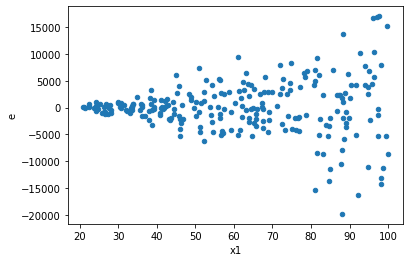

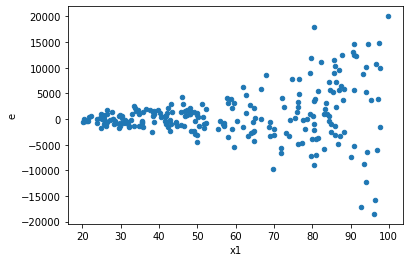

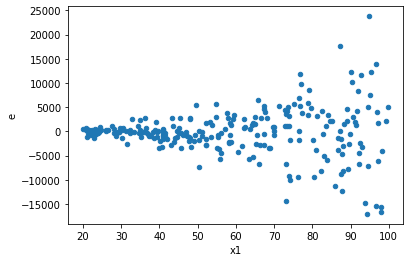

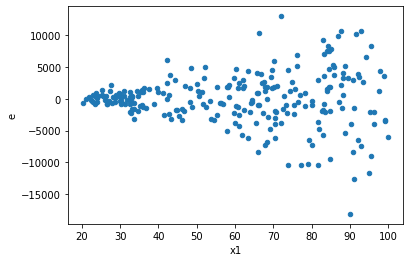

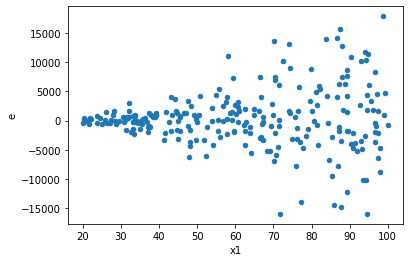

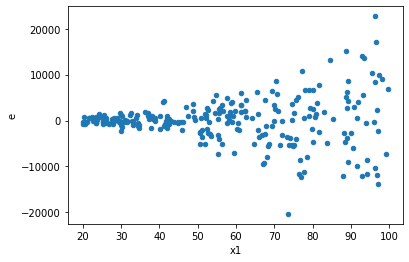

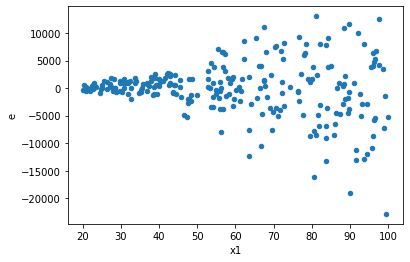

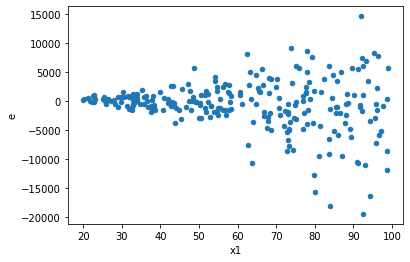

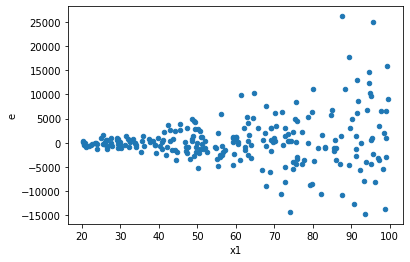

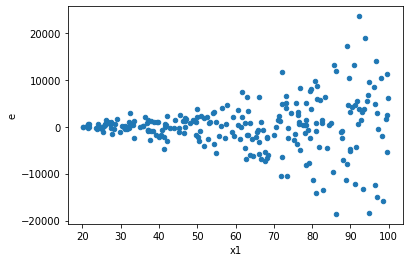

In [11]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x1', y='e', kind = 'scatter')
tablenew1.plot(x ='x1', y='e', kind = 'scatter')
tablenew2.plot(x ='x1', y='e', kind = 'scatter')
tablenew3.plot(x ='x1', y='e', kind = 'scatter')
tablenew4.plot(x ='x1', y='e', kind = 'scatter')
tablenew5.plot(x ='x1', y='e', kind = 'scatter')
tablenew6.plot(x ='x1', y='e', kind = 'scatter')
tablenew7.plot(x ='x1', y='e', kind = 'scatter')
tablenew8.plot(x ='x1', y='e', kind = 'scatter')
tablenew9.plot(x ='x1', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["y_hat"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
2.0,116.0,132.0,337795627.51708955,6991868074.220365,2912031.2716990476,52968697.53197246,18.189604640154656,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject005=0 : Heteroscedasticity
7.0,124.0,124.0,406948811.88573277,6342931935.435174,3281845.257143006,51152676.898670755,15.586559661012616,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject005=0 : Heteroscedasticity
8.0,123.0,125.0,481280455.23475677,4264679248.0707784,3912849.229550868,34117433.98456623,8.719332635385586,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject005=0 : Heteroscedasticity
11.0,137.0,111.0,345780229.63778585,5482753540.718073,2523943.282027634,49394176.04250516,19.57024010572214,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject005=0 : Heteroscedasticity
12.0,133.0,115.0,453433380.1568791,5628738544.861904,3409273.535014129,48945552.56401656,14.356592998869983,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject005=0 : Heteroscedasticity
16.0,133.0,115.0,584360059.8616223,5435630481.951968,4393684.660613702,47266352.01697364,10.757793439452607,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject005=0 : Heteroscedasticity
17.0,121.0,127.0,272841839.8139395,4314845902.027811,2254891.2381317313,33975164.58289615,15.067318551047256,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject005=0 : Heteroscedasticity
20.0,124.0,124.0,574290072.633104,5478632865.217051,4631371.553492774,44182523.106589116,9.539835574899756,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject005=0 : Heteroscedasticity
21.0,119.0,129.0,428519059.51159674,6731901441.390377,3601000.5000974517,52185282.491398275,14.4918842666048,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject005=0 : Heteroscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,139.0,109.0,4539339348.271328,437985307.2268527,32657117.61346279,4018213.827769291,0.1230425132839279,1.260600835562482e-28,Reject005=0 : Heteroscedasticity
1.0,129.0,119.0,5334163655.980189,316135325.57557774,41350105.860311545,2656599.374584687,0.06424649512528893,8.291593057261646e-43,Reject005=0 : Heteroscedasticity
2.0,116.0,132.0,337795627.51708955,6991868074.220365,2912031.2716990476,52968697.53197246,18.189604640154656,2.220446049250313e-16,Reject005=0 : Heteroscedasticity
3.0,131.0,117.0,5050547643.249076,566349022.8626084,38553798.80342806,4840589.938996653,0.1255541629938227,1.9492495264556385e-27,Reject005=0 : Heteroscedasticity
4.0,123.0,125.0,5983386744.435042,548587389.6212215,48645420.68646376,4388699.116969773,0.090218134719328,9.995235505427143e-34,Reject005=0 : Heteroscedasticity
5.0,104.0,144.0,4104774018.582478,545724805.0992932,39468980.947908446,3789755.5909673143,0.09601858218658017,5.5352536687133e-29,Reject005=0 : Heteroscedasticity
6.0,130.0,118.0,4305211148.821914,355004094.4595463,33117008.837091643,3008509.275080901,0.09084483716148051,1.1640873889597212e-34,Reject005=0 : Heteroscedasticity
7.0,124.0,124.0,406948811.88573277,6342931935.435174,3281845.257143006,51152676.898670755,15.586559661012616,2.220446049250313e-16,Reject005=0 : Heteroscedasticity
8.0,123.0,125.0,481280455.23475677,4264679248.0707784,3912849.229550868,34117433.98456623,8.719332635385586,2.220446049250313e-16,Reject005=0 : Heteroscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    1000
Name: Result_test, dtype: int64